In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df = df.drop(['CustomerID'],axis=1)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df['Genre'])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_13288\2452252918.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_13288\2452252918.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_13288\2452252918.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_13288\2452252918.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
 

In [22]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [13]:
import seaborn as sns

<Axes: xlabel='Genre', ylabel='count'>

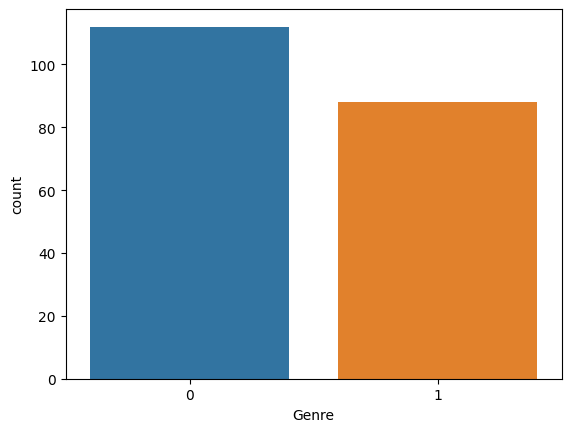

In [23]:
sns.countplot(x='Genre',data=df)

In [24]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [25]:
x= df.drop(['Genre'],axis=1)

In [26]:
y = df.Genre

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
model.score(xtest,ytest)

1.0

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model1 = RandomForestClassifier(n_estimators=50)

In [36]:
model1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50)

In [37]:
model1.score(xtest,ytest)

1.0

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
lr = cross_val_score(LogisticRegression(),xtrain,ytrain,cv=10)

In [41]:
lr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
pred=model1.predict(xtest)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(pred,ytest)

In [46]:
cm

array([[30,  0],
       [ 0, 20]], dtype=int64)

<Axes: >

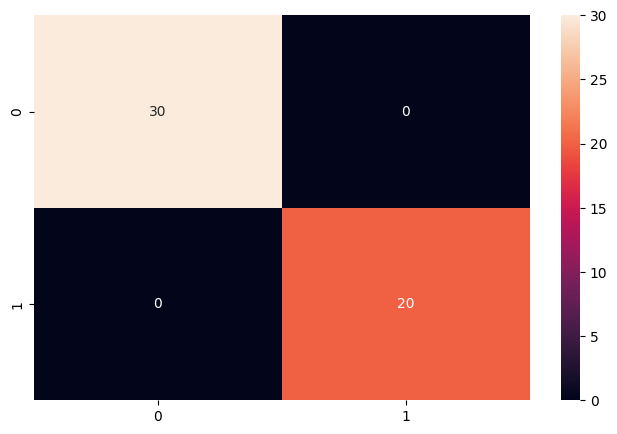

In [50]:
plt.figure(figsize=(8,5))

plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True)